In [2]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sb
import requests as rq
import io

In [8]:
url = rq.get("https://paleobiodb.org/data1.2/occs/taxa.txt?base_name=pterosauria&rank=max_genus&taxon_status=accepted&pres=regular&max_ma=252&min_ma=65&show=parent,app,size,class").content
pteros = pd.read_csv(io.StringIO(url.decode('utf-8'))).drop(columns=['extant_size', 'orig_no', 'taxon_no', 'parent_no', 'record_type', 'flags', 'difference', 'accepted_no', 'accepted_rank', 'accepted_name', 'container_no', 'reference_no', 'is_extant', 'phylum', 'type_taxon', 'firstapp_min_ma', 'lastapp_max_ma'])

pteros.columns = ['Rank', 'Name', 'Parent Taxon', 'Number of Occurrences', 'Max First Appearance (MYA)', 'Min Last Appearance (MYA)', 'Early Interval', 'Late Interval', 'Taxon Size', 'Class', 'Order', 'Family', 'Genus']
pteros = pteros[['Name', 'Rank', 'Genus', 'Parent Taxon', 'Family', 'Order', 'Class', 'Number of Occurrences', 'Taxon Size', 'Max First Appearance (MYA)', 'Min Last Appearance (MYA)', 'Early Interval', 'Late Interval']]
pteros['Late Interval'] = pteros['Late Interval'].fillna(pteros['Early Interval'])

conditions = [
    (pteros['Max First Appearance (MYA)'] < 252.1) & (pteros['Min Last Appearance (MYA)'] >= 201.4), 
    (pteros['Max First Appearance (MYA)'] < 201.4) & (pteros['Min Last Appearance (MYA)'] >= 145.0),
    (pteros['Max First Appearance (MYA)'] < 145.0) & (pteros['Min Last Appearance (MYA)'] >= 66.0)
]

eras = ['Triassic', 'Jurassic', 'Cretaceous']

pteros['Era'] = np.select(conditions, eras, default=pd.NaT) #--> Need to fix the type errors here
pteros.head()

,Name,Rank,Genus,Parent Taxon,Family,Order,Class,Number of Occurrences,Taxon Size,Max First Appearance (MYA),Min Last Appearance (MYA),Early Interval,Late Interval,Era
0,Pachagnathus,genus,Pachagnathus,Raeticodactylidae,Raeticodactylidae,Pterosauria,Reptilia,2,2,227.0,208.5,Norian,Norian,Triassic
1,Pachagnathus benitoi,species,Pachagnathus,Pachagnathus,Raeticodactylidae,Pterosauria,Reptilia,1,1,227.0,208.5,Norian,Norian,Triassic
2,Yelaphomte,genus,Yelaphomte,Raeticodactylidae,Raeticodactylidae,Pterosauria,Reptilia,2,2,227.0,208.5,Norian,Norian,Triassic
3,Yelaphomte praderioi,species,Yelaphomte,Yelaphomte,Raeticodactylidae,Pterosauria,Reptilia,1,1,227.0,208.5,Norian,Norian,Triassic
4,Dearc,genus,Dearc,Angustinaripterini,Rhamphorhynchidae,Pterosauria,Reptilia,2,2,168.2,165.3,Bathonian,Bathonian,Jurassic


In [4]:
# Splitting the Genus up from the Species to separate the Parent Taxon column (need to include that in the species dataframe)
genus = pteros[pteros["Rank"] == 'genus'].drop(columns=['Rank'])

# Creating the Species Dataframe to include the genus and parent taxon columns (this will be the main datafram we use)
species = pteros[pteros["Rank"] == 'species'].drop(columns=['Taxon Size', 'Rank', 'Parent Taxon'])
species = species.merge(genus[['Genus', 'Parent Taxon']], how='inner', on='Genus')[['Name', 'Genus', 'Parent Taxon', 'Family', 'Order', 'Class', 'Number of Occurrences', 'Max First Appearance (MYA)', 'Min Last Appearance (MYA)', 'Early Interval', 'Late Interval', 'Era']]
species.to_csv('pterosauria.csv', index=False)

species.head()

,Name,Genus,Parent Taxon,Family,Order,Class,Number of Occurrences,Max First Appearance (MYA),Min Last Appearance (MYA),Early Interval,Late Interval,Era
0,Pachagnathus benitoi,Pachagnathus,Raeticodactylidae,Raeticodactylidae,Pterosauria,Reptilia,1,227.0,208.5,Norian,Norian,Triassic
1,Yelaphomte praderioi,Yelaphomte,Raeticodactylidae,Raeticodactylidae,Pterosauria,Reptilia,1,227.0,208.5,Norian,Norian,Triassic
2,Dearc sgiathanach,Dearc,Angustinaripterini,Rhamphorhynchidae,Pterosauria,Reptilia,1,168.2,165.3,Bathonian,Bathonian,Jurassic
3,Angustinaripterus longicephalus,Angustinaripterus,Rhamphorhynchinae,Rhamphorhynchidae,Pterosauria,Reptilia,1,170.9,154.8,Bajocian,Oxfordian,Jurassic
4,Cacibupteryx caribensis,Cacibupteryx,Rhamphorhynchinae,Rhamphorhynchidae,Pterosauria,Reptilia,1,161.5,154.8,Oxfordian,Oxfordian,Jurassic


<Axes: xlabel='Era', ylabel='Count'>

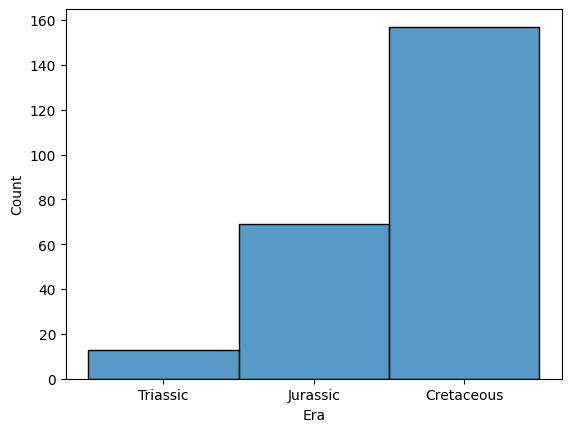

In [7]:
sb.histplot(data=species, x='Era')